# Movie Genre Identifier

This is an NLP (Natural Language Processing) project. The objective of this project is to build a model that predicts the genre of a movie by taking the movie's description as input. The dataset for this project was produced by merging three different movies datasets collected from Kaggle. Every movie in the dataset has a title, a description and one or more genres. A Naive Bayes model was trained and tested on the dataset to predict the genres of the movies.

**Overview of the Cleaned Dataset**
- Total Movies: 4000
- Total Genres: 5
- Oldest Movie in the dataset is The Cabinet of Dr. Caligari from 1920
- Latest Movie in the dataset is The Gray Man from 2022

**Visual Representation of the Model**
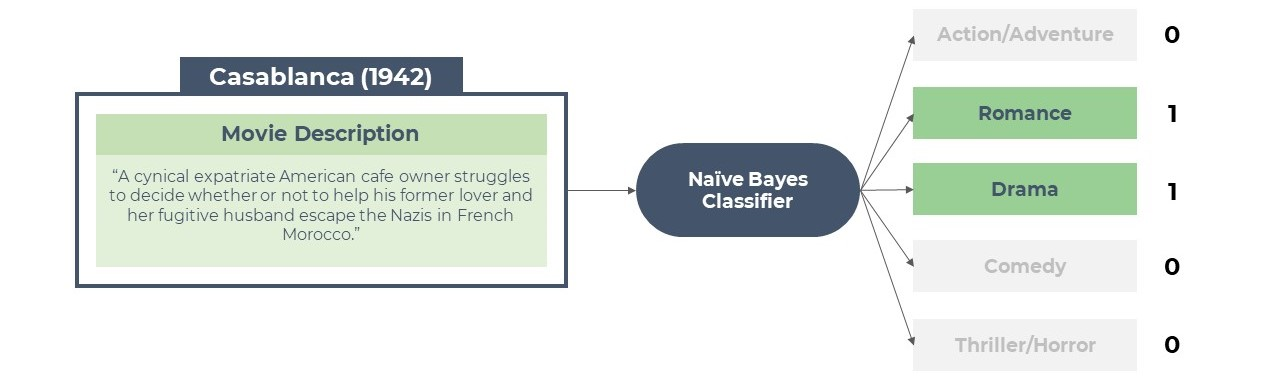

### Importing Libraries and Datasets 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

!pip install seaborn
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
import spacy

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Using cached setuptools-67.7.2-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)


ERROR: To modify pip, please run the following command:
C:\Users\vubanc\AppData\Local\anaconda3\python.exe -m pip install -U pip setuptools wheel


     --------------------------------------- 12.8/12.8 MB 21.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [39]:
pd.set_option('display.max_rows', None)

#Importing three datasets containing information on movies
df1 = pd.read_csv("Highest Holywood Grossing Movies.csv")
df2 = pd.read_csv("Netflix TV Shows and Movies.csv")
df3 = pd.read_csv("IMDB Movies Dataset.csv")

In [40]:
print(df1.shape)
df1.head(2)

(918, 11)


,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13


In [41]:
print(df2.shape)
df2.head(2)

(5850, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179


In [42]:
print(df3.shape)
df3.head(2)

(1000, 16)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


### Combined Dataset Preparation

In [43]:
#Preprocessing the first dataset

for row in range(len(df1)):
    df1.loc[row, "Movie Genre"] = re.sub(r"[^\w\s]", "", df1.loc[row, "Genre"]) #Using regex to drop symbols & numbers
    df1.loc[row, "Movie Genre"] = df1.loc[row, "Movie Genre"].lower()
    #The following regular expression only keeps movies from the most common genres
    df1.loc[row, "Movie Genre"] = re.sub(r"\b(?!(action|adventure|drama|comedy|romance|thriller|horror)\b)\w+\b", "", df1.loc[row, "Movie Genre"])
    df1.loc[row, "Movie Genre"] = re.sub(r"[\s]+$", "", df1.loc[row, "Movie Genre"]) #Removing spaces at the end
    df1.loc[row, "Movie Genre"] = re.sub(r"^[\s]+", "", df1.loc[row, "Movie Genre"]) #Removing spaces at the beginning
    df1.loc[row, "Movie Genre"] = re.sub(r"\b[\s]{2,}\b", " ", df1.loc[row, "Movie Genre"]) #Removing spaces in the middle
    df1.loc[row, "Movie Genre"] = re.sub(r"\b(action|adventure)\b", "action/adventure", df1.loc[row, "Movie Genre"]) #Merging
    df1.loc[row, "Movie Genre"] = re.sub(r"\b(thriller|horror)\b", "thriller/horror", df1.loc[row, "Movie Genre"]) #Merging

df1 = df1[df1["Movie Genre"]!=""] #Removing movies whose genres were replaced by "" with the above regular expressions
df1.reset_index(inplace=True)
df1["Movie Genre"] = df1["Movie Genre"].str.split(" ")
df1 = df1[["Title", "Movie Info", "Movie Genre"]]
df1.columns = ["Movie Title", "Movie Description", "Movie Genre"]

unique_genres = ["Action/Adventure", "Romance", "Drama", "Comedy", "Thriller/Horror"]
print(unique_genres)

for genre in unique_genres:
    for row in range(len(df1)):
        df1.loc[row, genre] = (genre.lower() in df1.loc[row, "Movie Genre"])
    df1[genre] = df1[genre].astype(int)


print(df1.shape)
df1.head()

['Action/Adventure', 'Romance', 'Drama', 'Comedy', 'Thriller/Horror']
(918, 8)


,Movie Title,Movie Description,Movie Genre,Action/Adventure,Romance,Drama,Comedy,Thriller/Horror
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...","[action/adventure, action/adventure]",1,0,0,0,0
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,"[action/adventure, action/adventure, drama]",1,0,1,0,0
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,"[action/adventure, action/adventure]",1,0,0,0,0
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...","[action/adventure, action/adventure]",1,0,0,0,0
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,"[action/adventure, action/adventure]",1,0,0,0,0


In [44]:
#Preprocessing the second dataset

for row in range(len(df2)):
    df2.loc[row, "Movie Genre"] = re.sub(r"[^\w\s]", "", df2.loc[row, "genres"]) #Using regex to drop symbols & numbers
    df2.loc[row, "Movie Genre"] = df2.loc[row, "Movie Genre"].lower()
    #The following regular expression only keeps movies from the most common genres
    df2.loc[row, "Movie Genre"] = re.sub(r"\b(?!(action|adventure|drama|comedy|romance|thriller|horror)\b)\w+\b", "", df2.loc[row, "Movie Genre"])
    df2.loc[row, "Movie Genre"] = re.sub(r"[\s]+$", "", df2.loc[row, "Movie Genre"]) #Removing spaces at the end
    df2.loc[row, "Movie Genre"] = re.sub(r"^[\s]+", "", df2.loc[row, "Movie Genre"]) #Removing spaces at the beginning
    df2.loc[row, "Movie Genre"] = re.sub(r"\b[\s]{2,}\b", " ", df2.loc[row, "Movie Genre"]) #Removing spaces in the middle
    df2.loc[row, "Movie Genre"] = re.sub(r"\b(action|adventure)\b", "action/adventure", df2.loc[row, "Movie Genre"]) #Merging
    df2.loc[row, "Movie Genre"] = re.sub(r"\b(thriller|horror)\b", "thriller/horror", df2.loc[row, "Movie Genre"]) #Merging

df2 = df2[df2["type"]=="MOVIE"]
df2 = df2[df2["Movie Genre"]!=""] #Removing movies whose genres were replaced by "" with the above regular expressions
df2.reset_index(inplace=True)
df2["Movie Genre"] = df2["Movie Genre"].str.split(" ")
df2 = df2[["title", "description", "Movie Genre"]]
df2.columns = ["Movie Title", "Movie Description", "Movie Genre"]

unique_genres = ["Action/Adventure", "Romance", "Drama", "Comedy", "Thriller/Horror"]
print(unique_genres)

for genre in unique_genres:
    for row in range(len(df2)):
        df2.loc[row, genre] = (genre.lower() in df2.loc[row, "Movie Genre"])
    df2[genre] = df2[genre].astype(int)

df2 = df2[df2["Movie Title"].isin(list(df2["Movie Title"].unique()))]

print(df2.shape)
df2.head()

['Action/Adventure', 'Romance', 'Drama', 'Comedy', 'Thriller/Horror']
(3194, 8)


,Movie Title,Movie Description,Movie Genre,Action/Adventure,Romance,Drama,Comedy,Thriller/Horror
0,Taxi Driver,A mentally unstable Vietnam War veteran works ...,[drama],0,0,1,0,0
1,Deliverance,Intent on seeing the Cahulawassee River before...,"[drama, action/adventure, thriller/horror]",1,0,1,0,1
2,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...","[action/adventure, comedy]",1,0,0,1,0
3,The Dirty Dozen,12 American military prisoners in World War II...,[action/adventure],1,0,0,0,0
4,Life of Brian,"Brian Cohen is an average young Jewish man, bu...",[comedy],0,0,0,1,0


In [45]:
#Preprocessing the third dataset

for row in range(len(df3)):
    df3.loc[row, "Movie Genre"] = re.sub(r"[^\w\s]", "", df3.loc[row, "Genre"]) #Using regex to drop symbols & numbers
    df3.loc[row, "Movie Genre"] = df3.loc[row, "Movie Genre"].lower()
    #The following regular expression only keeps movies from the most common genres
    df3.loc[row, "Movie Genre"] = re.sub(r"\b(?!(action|adventure|comedy|romance|thriller|horror)\b)\w+\b", "", df3.loc[row, "Movie Genre"])
    df3.loc[row, "Movie Genre"] = re.sub(r"[\s]+$", "", df3.loc[row, "Movie Genre"]) #Removing spaces at the end
    df3.loc[row, "Movie Genre"] = re.sub(r"^[\s]+", "", df3.loc[row, "Movie Genre"]) #Removing spaces at the beginning
    df3.loc[row, "Movie Genre"] = re.sub(r"\b[\s]{2,}\b", " ", df3.loc[row, "Movie Genre"]) #Removing spaces in the middle
    df3.loc[row, "Movie Genre"] = re.sub(r"\b(action|adventure)\b", "action/adventure", df3.loc[row, "Movie Genre"]) #Merging
    df3.loc[row, "Movie Genre"] = re.sub(r"\b(thriller|horror)\b", "thriller/horror", df3.loc[row, "Movie Genre"]) #Merging

df3 = df3[df3["Movie Genre"]!=""] #Removing movies whose genres were replaced by "" with the above regular expressions
df3.reset_index(inplace=True)
df3["Movie Genre"] = df3["Movie Genre"].str.split(" ")
df3 = df3[["Series_Title", "Overview", "Movie Genre"]]
df3.columns = ["Movie Title", "Movie Description", "Movie Genre"]


unique_genres = ["Action/Adventure", "Romance", "Drama", "Comedy", "Thriller/Horror"]
print(unique_genres)

for genre in unique_genres:
    for row in range(len(df3)):
        df3.loc[row, genre] = (genre.lower() in df3.loc[row, "Movie Genre"])
    df3[genre] = df3[genre].astype(int)

df3 = df3[df3["Movie Title"].isin(list(df3["Movie Title"].unique()))]

print(df3.shape)
df3.head()

['Action/Adventure', 'Romance', 'Drama', 'Comedy', 'Thriller/Horror']
(657, 8)


,Movie Title,Movie Description,Movie Genre,Action/Adventure,Romance,Drama,Comedy,Thriller/Horror
0,The Dark Knight,When the menace known as the Joker wreaks havo...,[action/adventure],1,0,0,0,0
1,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,"[action/adventure, action/adventure]",1,0,0,0,0
2,Inception,A thief who steals corporate secrets through t...,"[action/adventure, action/adventure]",1,0,0,0,0
3,The Lord of the Rings: The Fellowship of the Ring,A meek Hobbit from the Shire and eight compani...,"[action/adventure, action/adventure]",1,0,0,0,0
4,Forrest Gump,"The presidencies of Kennedy and Johnson, the e...",[romance],0,1,0,0,0


In [46]:
#Concatenating the three datasets
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df.dropna(axis=0, subset=["Movie Description"], inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head()

(4766, 8)


,Movie Title,Movie Description,Movie Genre,Action/Adventure,Romance,Drama,Comedy,Thriller/Horror
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...","[action/adventure, action/adventure]",1,0,0,0,0
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,"[action/adventure, action/adventure, drama]",1,0,1,0,0
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,"[action/adventure, action/adventure]",1,0,0,0,0
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...","[action/adventure, action/adventure]",1,0,0,0,0
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,"[action/adventure, action/adventure]",1,0,0,0,0


,Movie Genre,Proportion
0,Action/Adventure,0.335711
1,Romance,0.202476
2,Drama,0.456148
3,Comedy,0.462023
4,Thriller/Horror,0.273395


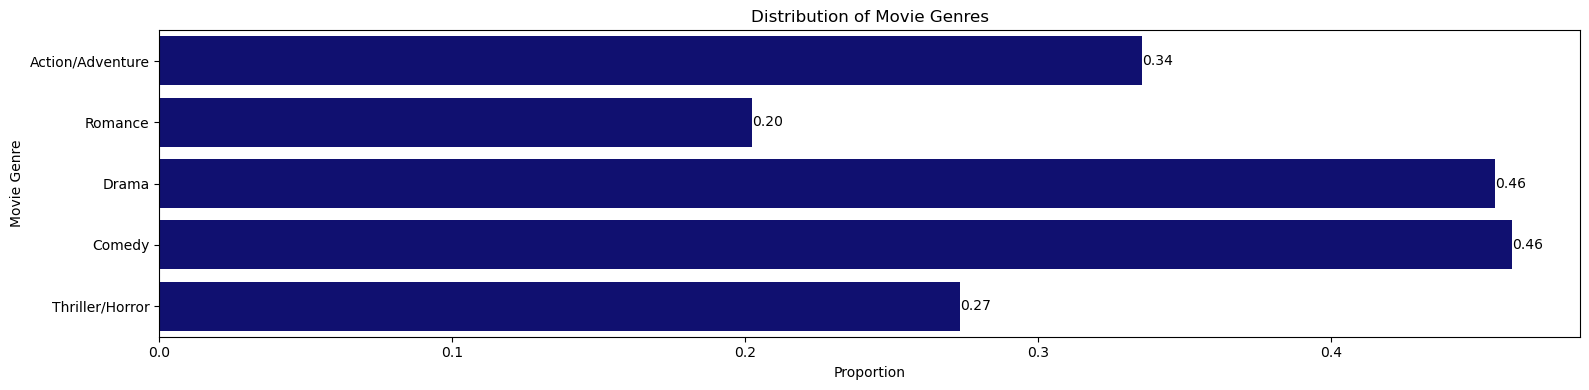

In [47]:
#Displaying the distribution of the genres

data_distribution = pd.DataFrame(df[["Action/Adventure", "Romance", "Drama", "Comedy", "Thriller/Horror"]].mean())
data_distribution.reset_index(inplace=True)
data_distribution.columns = ["Movie Genre", "Proportion"]

fig, axs = plt.subplots(1,1, figsize=(16,4))
sns.barplot(data=data_distribution, y="Movie Genre", x = "Proportion", color="navy", ax=axs)
axs.bar_label(axs.containers[0], fmt="%.2f")
axs.set_title("Distribution of Movie Genres")

plt.tight_layout()
data_distribution

### Tokenization and Document-Term Matrix Preparation

In [48]:
from string import punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('omw-1.4') #A open multilingual wordnet that has definitions of words and their relationships
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vubanc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vubanc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vubanc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
stop_words =  stopwords.words('english')
nlp = spacy.load("en_core_web_sm")

def CleanText(text, remove_stop_words = False, lemmatize_words = False):
    doc = nlp(text)
    clean_text = " ".join([str(token) for token in doc if token.pos_ != "PROPN"]) #Removing proper nouns
    
    clean_text = re.sub("(’s)?('s)?", "", clean_text) #Removing apostrophe s 
    clean_text = re.sub("(s’)?(s')", "s", clean_text) #Removing apostrophe s
    clean_text = re.sub("(https://)?(www.)?.+(\.com).+", "", clean_text) #Removing links
    clean_text = re.sub("[^a-zA-Z0-9\s]", " ", clean_text) #Removing punctuation
    clean_text = "".join([c for c in clean_text if c not in punctuation])
    clean_text = re.sub("[0-9]\.?[0-9]?", "", clean_text) #Removing numbers
    clean_text = re.sub(r"\b\w\b",  "", clean_text) #Removing isolated alphabets (\b works better than ^ and $)
    clean_text = re.sub("[\s]+", " ", clean_text) #Removing multiple spaces
    clean_text = clean_text.lower() #Converting to lowercase
    
    
    if remove_stop_words==True:
        clean_text = clean_text.split(" ")
        clean_text = [word for word in clean_text if word not in stop_words]
        clean_text = " ".join(clean_text)
    
    if lemmatize_words==True:
        clean_text = clean_text.split(" ")
        lemmatizer = WordNetLemmatizer()
        clean_text = [lemmatizer.lemmatize(word) for word in clean_text]
        clean_text = " ".join(clean_text)
    return clean_text

In [50]:
for row in range(len(df)):
    df.loc[row,"Movie Description"] = CleanText(df.loc[row,"Movie Description"], True, True)

In [51]:
cv = CountVectorizer(stop_words = "english")
df_cv = cv.fit_transform(df["Movie Description"])
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names_out())
#df_dtm["Movie Genre"] = df["Movie Genre"]
df_dtm = pd.concat([df_dtm, df[["Action/Adventure", "Romance", "Drama", "Comedy", "Thriller/Horror"]]], axis=1)
df_dtm.reset_index(inplace=True, drop=True)

In [73]:
print(df_dtm.shape)
df_dtm.head()

(4000, 10207)


,aaliya,aasi,aback,abandon,abandoned,abandoning,abdomen,abduct,abducted,abduction,...,zone,zoo,zookeeper,zoological,zor,Action/Adventure,Romance,Drama,Comedy,Thriller/Horror
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Exploratory Data Analysis

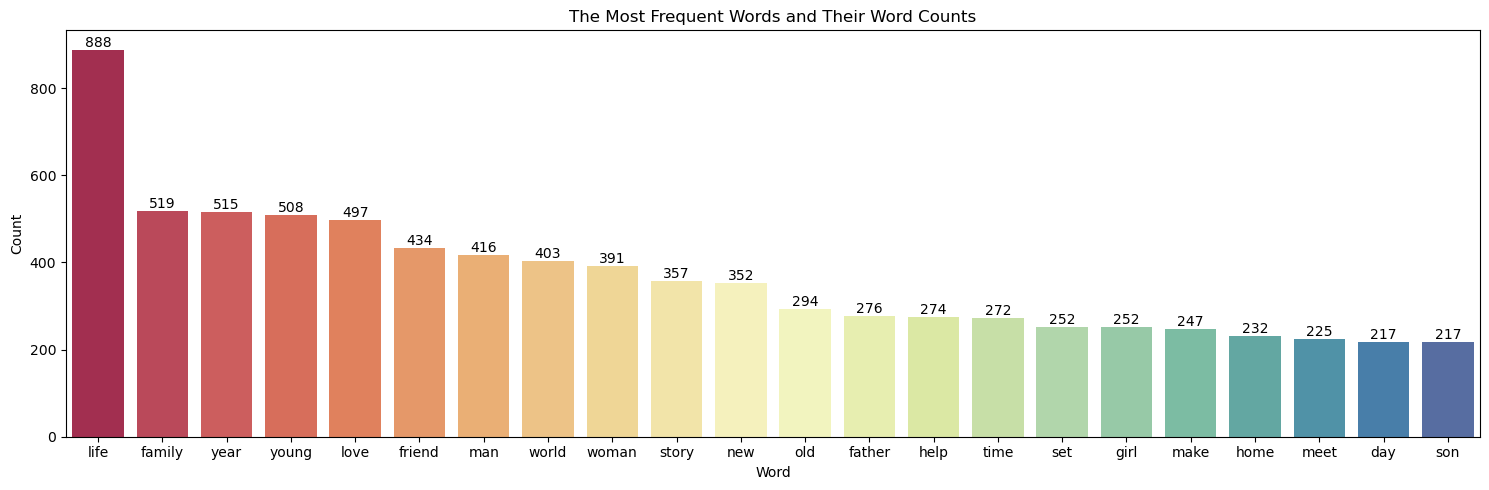

In [53]:
#Finding the most frequent words in movie descriptions   
df_word_count = pd.DataFrame(df_dtm.iloc[:,0:-5].sum(axis=0))
df_word_count.reset_index(inplace=True)
df_word_count.columns = ["Word", "Count"]
df_word_count = df_word_count.sort_values("Count", ascending=False)
df_word_count.reset_index(inplace=True, drop=True)

fig, axs = plt.subplots(1,1,figsize=(15,5))
sns.barplot(data=df_word_count.loc[0:21,:], x="Word", y="Count", palette="Spectral", ax=axs)
axs.set_title("The Most Frequent Words and Their Word Counts")
axs.bar_label(axs.containers[0])

plt.tight_layout()

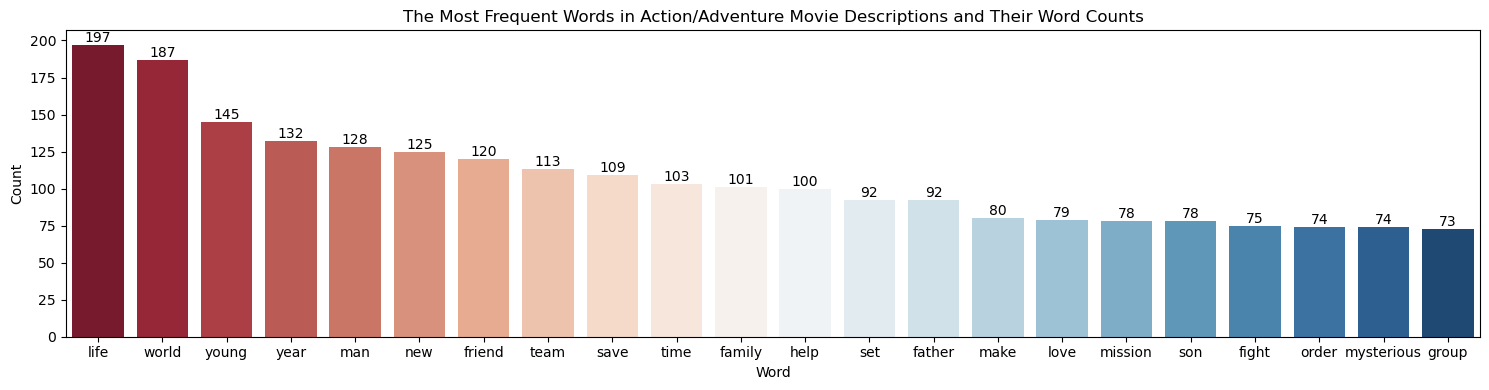

In [54]:
#Finding the most frequent words in action/adventure movie descriptions
df_action = df_dtm[df_dtm["Action/Adventure"]==1]

df_word_count = pd.DataFrame(df_action.iloc[:,0:-5].sum(axis=0))
df_word_count.reset_index(inplace=True)
df_word_count.columns = ["Word", "Count"]
df_word_count = df_word_count.sort_values("Count", ascending=False)
df_word_count.reset_index(inplace=True, drop=True)

fig, axs = plt.subplots(1,1,figsize=(15,4))
sns.barplot(data=df_word_count.loc[0:21,:], x="Word", y="Count", palette="RdBu", ax=axs)
axs.set_title("The Most Frequent Words in Action/Adventure Movie Descriptions and Their Word Counts")
axs.bar_label(axs.containers[0])

plt.tight_layout()

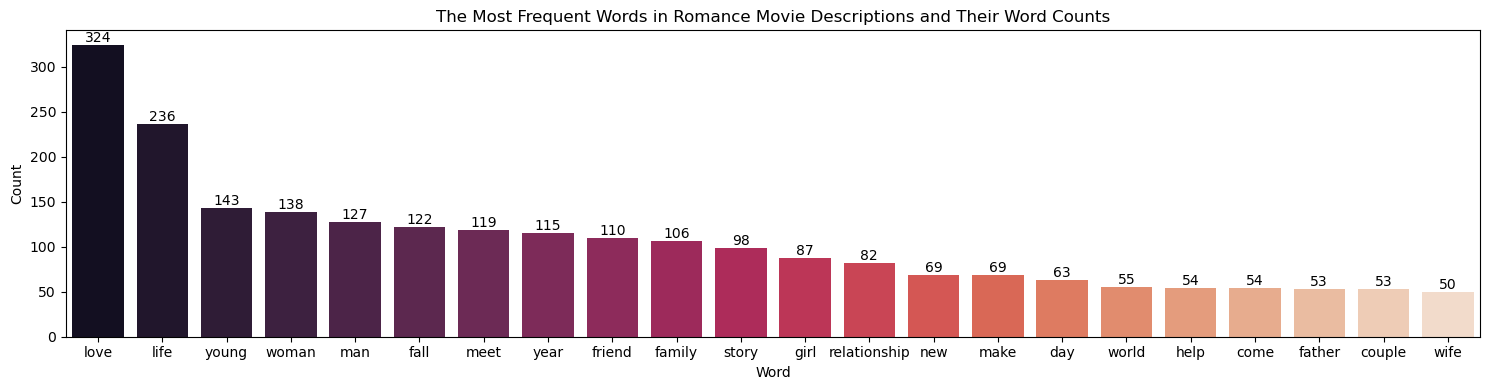

In [55]:
#Finding the most frequent words in romance movie descriptions
df_romance = df_dtm[df_dtm["Romance"]==1]

df_word_count = pd.DataFrame(df_romance.iloc[:,0:-5].sum(axis=0))
df_word_count.reset_index(inplace=True)
df_word_count.columns = ["Word", "Count"]
df_word_count = df_word_count.sort_values("Count", ascending=False)
df_word_count.reset_index(inplace=True, drop=True)

fig, axs = plt.subplots(1,1,figsize=(15,4))
sns.barplot(data=df_word_count.loc[0:21,:], x="Word", y="Count", palette="rocket", ax=axs)
axs.set_title("The Most Frequent Words in Romance Movie Descriptions and Their Word Counts")
axs.bar_label(axs.containers[0])

plt.tight_layout()

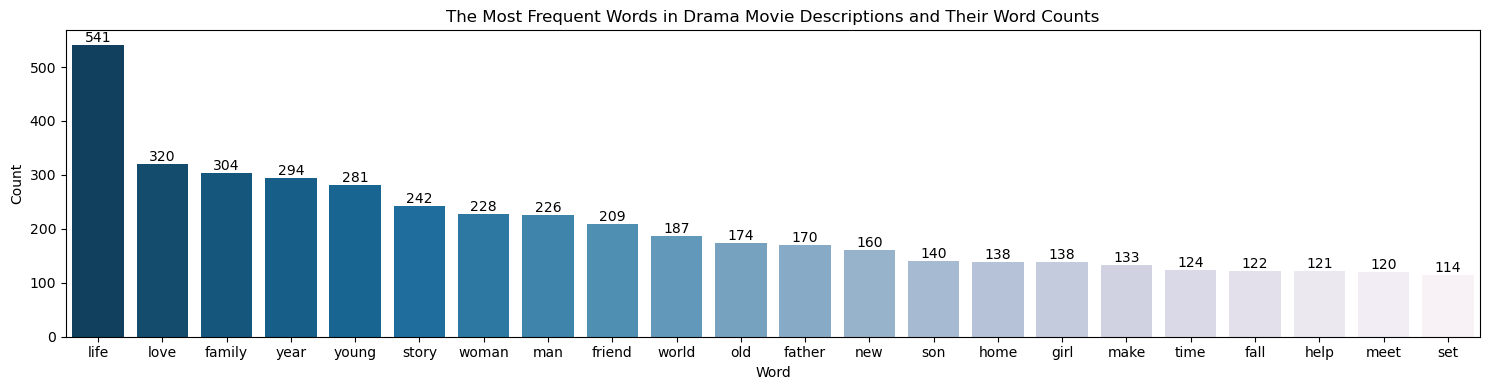

In [56]:
#Finding the most frequent words in drama movie descriptions
df_drama = df_dtm[df_dtm["Drama"]==1]

df_word_count = pd.DataFrame(df_drama.iloc[:,0:-5].sum(axis=0))
df_word_count.reset_index(inplace=True)
df_word_count.columns = ["Word", "Count"]
df_word_count = df_word_count.sort_values("Count", ascending=False)
df_word_count.reset_index(inplace=True, drop=True)

fig, axs = plt.subplots(1,1,figsize=(15,4))
sns.barplot(data=df_word_count.loc[0:21,:], x="Word", y="Count", palette="PuBu_r", ax=axs)
axs.set_title("The Most Frequent Words in Drama Movie Descriptions and Their Word Counts")
axs.bar_label(axs.containers[0])

plt.tight_layout()

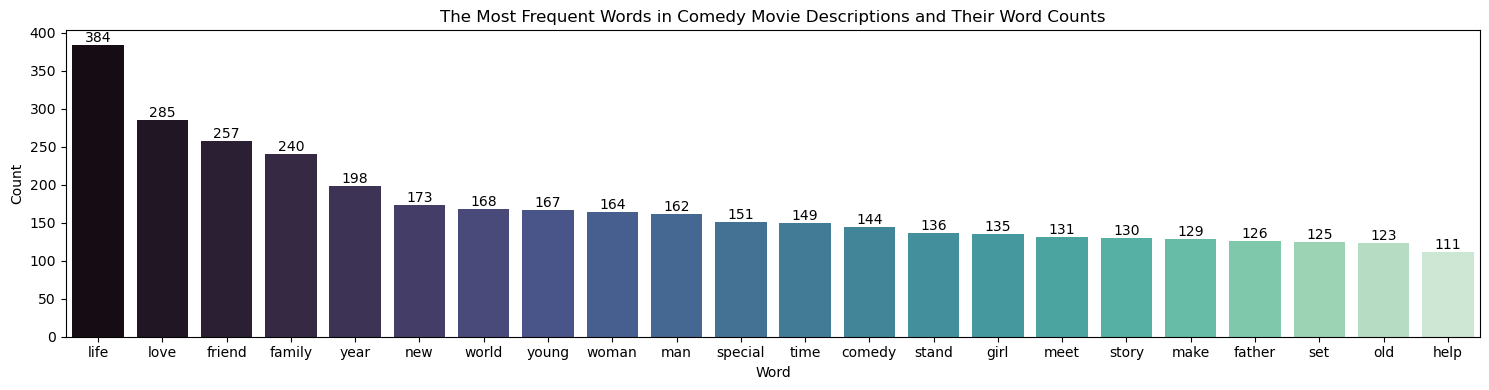

In [57]:
#Finding the most frequent words in comedy movie descriptions
df_comedy = df_dtm.loc[df_dtm["Comedy"]==1, :]

df_word_count = pd.DataFrame(df_comedy.iloc[:,0:-5].sum(axis=0))
df_word_count.reset_index(inplace=True)
df_word_count.columns = ["Word", "Count"]
df_word_count = df_word_count.sort_values("Count", ascending=False)
df_word_count.reset_index(inplace=True, drop=True)

fig, axs = plt.subplots(1,1,figsize=(15,4))
sns.barplot(data=df_word_count.loc[0:21,:], x="Word", y="Count", palette="mako", ax=axs)
axs.set_title("The Most Frequent Words in Comedy Movie Descriptions and Their Word Counts")
axs.bar_label(axs.containers[0])

plt.tight_layout()

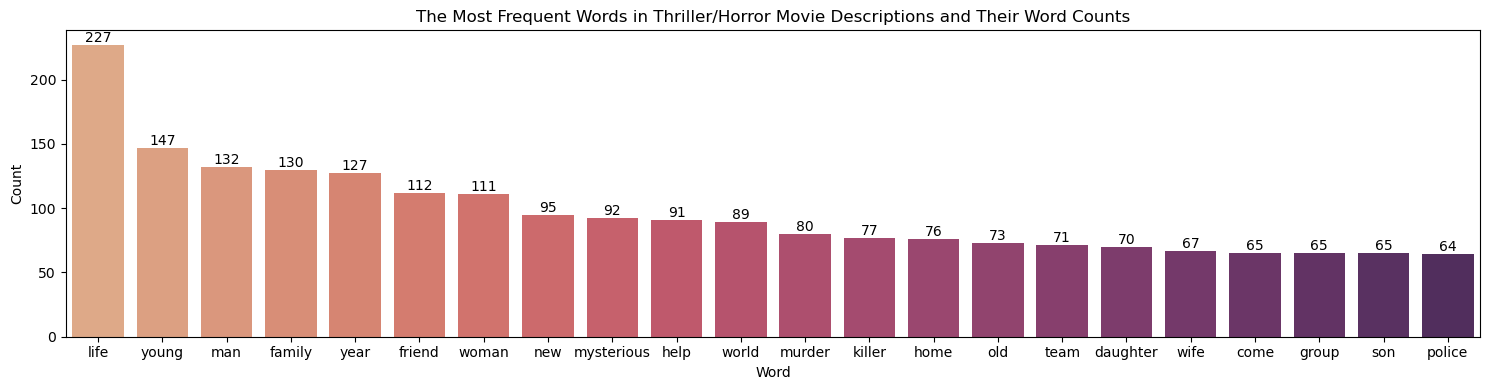

In [58]:
#Finding the most frequent word in thriller/horror movies
df_thriller = df_dtm.loc[df_dtm["Thriller/Horror"]==1, :]

df_word_count = pd.DataFrame(df_thriller.iloc[:,0:-5].sum(axis=0))
df_word_count.reset_index(inplace=True)
df_word_count.columns = ["Word", "Count"]
df_word_count = df_word_count.sort_values("Count", ascending=False)
df_word_count.reset_index(inplace=True, drop=True)

fig, axs = plt.subplots(1,1,figsize=(15,4))
sns.barplot(data=df_word_count.loc[0:21,:], x="Word", y="Count", palette="flare", ax=axs)
axs.set_title("The Most Frequent Words in Thriller/Horror Movie Descriptions and Their Word Counts")
axs.bar_label(axs.containers[0])

plt.tight_layout()

count    10202.000000
mean         6.711233
std         21.844764
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        821.000000
Name: Count, dtype: float64

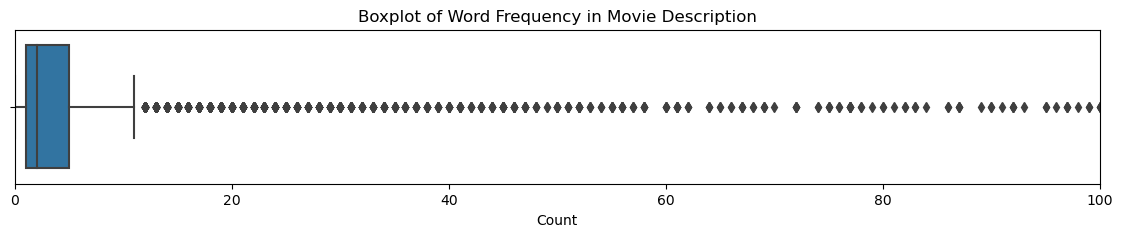

In [69]:
#How frequently do the words come up in the descriptions?
df_word_count = pd.DataFrame(df_dtm.iloc[:,0:-5].sum(axis=0))
df_word_count.reset_index(inplace=True)
df_word_count.columns = ["Word", "Count"]

fig, axs = plt.subplots(1,1,figsize=(14,2))
sns.boxplot(data=df_word_count, x="Count", ax=axs)
axs.set_title("Boxplot of Word Frequency in Movie Description")
axs.set_xlim(left=0,right=100)

df_word_count["Count"].describe()

count    4000.000000
mean       18.632750
std         9.276497
min        11.000000
25%        13.000000
50%        15.000000
75%        20.000000
max       100.000000
Name: Length, dtype: float64

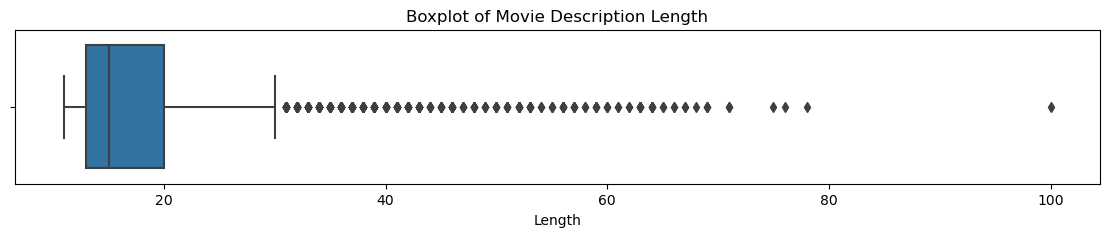

In [70]:
#How long are the movie descriptions?
df_des_length = pd.DataFrame(df_dtm.iloc[:,0:-1].sum(axis=1))
df_des_length.columns = ["Length"]
fig, axs = plt.subplots(1,1,figsize=(14,2))
sns.boxplot(data=df_des_length, x="Length", ax=axs)
axs.set_title("Boxplot of Movie Description Length")

df_des_length["Length"].describe()

In [61]:
#Removing observations with description lengths below 10 words (25 percentile length)
df_dtm = df_dtm[df_des_length["Length"]>10]
print(f"Total Movies: {len(df_dtm)}")

Total Movies: 4000


,Movie Genre,Proportion
0,Action/Adventure,0.34050
1,Romance,0.21675
2,Drama,0.48500
3,Comedy,0.47350
4,Thriller/Horror,0.26900


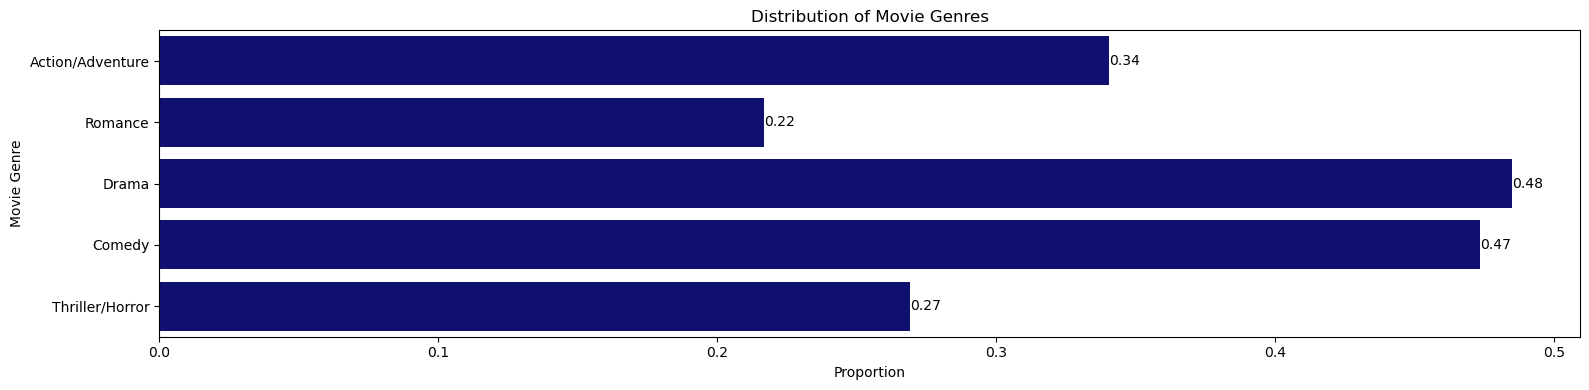

In [72]:
data_distribution = pd.DataFrame(df_dtm[["Action/Adventure", "Romance", "Drama", "Comedy", "Thriller/Horror"]].mean())
data_distribution.reset_index(inplace=True)
data_distribution.columns = ["Movie Genre", "Proportion"]

fig, axs = plt.subplots(1,1, figsize=(16,4))
sns.barplot(data=data_distribution, y="Movie Genre", x = "Proportion", color="navy", ax=axs)
axs.bar_label(axs.containers[0], fmt="%.2f")
axs.set_title("Distribution of Movie Genres")

plt.tight_layout()
data_distribution

### Building the Naive Bayes Classifier 

In [63]:
class NaiveBayesClassifier():
    
    def __init__(self, laplace_smoothing_alpha):
        self.alpha = laplace_smoothing_alpha
    
    def GetPriorProbability(self,Y):
        prior_probability= Y.value_counts(normalize=True, ascending=True)
        return dict(prior_probability)
    
    def GetLikelihood(self,X,Y):
        data = pd.concat([X,Y], axis=1)
        features = list(X.columns)
        target_variable = list(data.columns)[-1]
        labels = list(Y.unique())
        
        WordCountsByLabel = data.groupby(target_variable).sum()
        WordCountsByLabel.reset_index(inplace=True)
        
        TotalWordsByLabel = {target_variable : list(WordCountsByLabel[target_variable].unique()), "Total Words":list(WordCountsByLabel.sum(axis=1))}
        TotalWordsByLabel = pd.DataFrame(TotalWordsByLabel)
        
        likelihoods = {}
        for label in labels:
            df_temp = WordCountsByLabel[WordCountsByLabel[target_variable]==label][features]+self.alpha
            total_words = df_temp.sum(axis=1)
            likelihoods[label] = df_temp/int(total_words)
        
        return dict(likelihoods)
        
    
    def Classify(self, X_train, Y_train, X_test):
        X_test.reset_index(inplace=True, drop=True)
        features = list(X_test.columns)
        labels = list(Y_train.unique())
        
        prior_probabilities = self.GetPriorProbability(Y_train)
        likelihoods = self.GetLikelihood(X_train,Y_train)
        predictions = []
        
        for row in range(0,len(X_test)):
            df_temp = X_test.loc[row:row, :]
            words = list(df_temp.loc[:,(df_temp!=0).any(axis=0)].columns) #Discarding words that do not appear in the description
            
            posterior_probabilities = {}
            for label in labels:
                posterior_probabilities[label] = prior_probabilities[label]
                for word in words:
                    posterior_probabilities[label] = posterior_probabilities[label]*float(likelihoods[label][word])
            predictions.append(max(posterior_probabilities, key=posterior_probabilities.get))
        return predictions

## Fitting and Testing the model 

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import BernoulliNB

In [65]:
X = df_dtm.iloc[:,:-5]
Y = df_dtm.iloc[:,-5:]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15, random_state=41)

In [66]:
NB = NaiveBayesClassifier(laplace_smoothing_alpha=2)

In [67]:
for genre in Y_train.columns:
    predictions = NB.Classify(X_train, Y_train[genre], X_test)
    print(f"Accuracy score for {genre} movies: {accuracy_score(predictions, Y_test[genre])*100}%")

Accuracy score for Action/Adventure movies: 78.83333333333333%
Accuracy score for Romance movies: 80.83333333333333%
Accuracy score for Drama movies: 65.16666666666666%
Accuracy score for Comedy movies: 75.33333333333333%
Accuracy score for Thriller/Horror movies: 76.5%


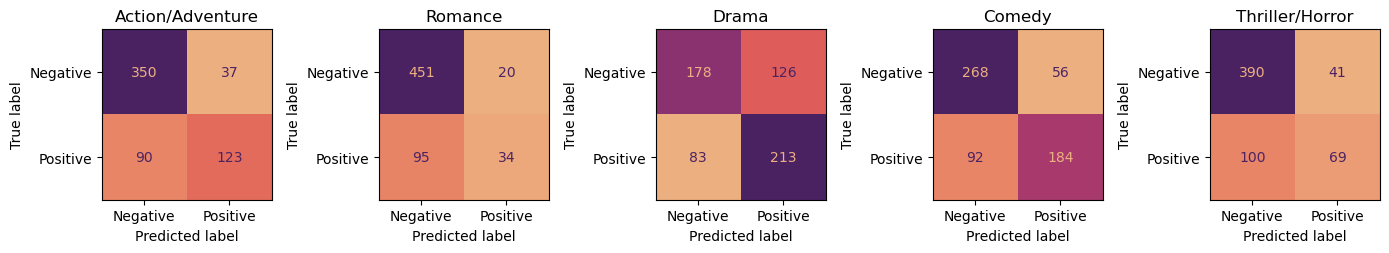

In [68]:
fig, axs = plt.subplots(1,5, figsize=(14,6))
for index, genre in enumerate(Y_train.columns):
    predictions = NB.Classify(X_train, Y_train[genre], X_test)
    cm = confusion_matrix(list(Y_test[genre]), predictions)  # Change variable name to 'cm'
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    cm_display.plot(colorbar=False, cmap="flare", ax=axs[index])
    axs[index].set_title(genre)
    plt.tight_layout()

# The End